# The Cancer Gene Atlas Cancer (TCGA) - Rectum Adenocarcinoma (READ)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
pandas 0.22.0
clustergrammer_widget 1.9.0
seaborn 0.8.1
Wed May 09 14:28:31 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Rectum adenocarcinoma [READ]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-6136,229,READ,TCGA,5bc1db25-3e25-44d7-99cb-e31f00cf1d58,AF,72.0,Rectosigmoid Junction,139,Nationwide Children's Hospital,NaN,...,25.8,NaN,NaN,No,NaN,NaN,NaN,NaN,YES,NaN
TCGA-AF-3913,230,READ,TCGA,03a9dd9d-62ae-4acd-9272-389274858f3d,AF,60.0,Rectosigmoid Junction,46,Nationwide Children's Hospital,NaN,...,29.5,NaN,NaN,"Yes, History of Prior Malignancy",Prostate,"Adenocarcinoma, Not Otherwise Specified",Prior Malignancy,NaN,NO,NaN
TCGA-AF-2687,231,READ,TCGA,f9204a59-6877-4d06-a20e-fd7ab0859ed5,AF,57.0,Rectum,122,Nationwide Children's Hospital,NaN,...,25.7,NaN,NaN,No,NaN,NaN,NaN,NaN,NO,NaN
TCGA-AF-3400,232,READ,TCGA,cbcb2141-b415-4410-8dd7-2a3cd3980a19,AF,54.0,Rectosigmoid Junction,42,Nationwide Children's Hospital,NaN,...,27.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NO,NaN
TCGA-AF-A56N,233,READ,TCGA,811F3FEB-A5A9-48B1-ACDA-FBB23FCBCF16,AF,47.0,Rectum,411,Nationwide Children's Hospital,NaN,...,28.7,NaN,NaN,No,NaN,NaN,NaN,NaN,NO,NaN


In [16]:
sample_meta.shape

(170, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_READ_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,09c94870-7d53-4074-884d-d6d37ed9abec,729fbf9f-8e00-4696-8552-0ee12348f06f,79674a90-82c7-4141-9630-7910ba5c5811,bfadb367-8a6a-4303-8fae-771666c90d7a,99cecfeb-ecd0-49d6-ace2-624acc608dee,607583e9-e6bc-4666-b961-79bb06c7ad1f,eb3ffa8d-cc46-48d3-b4be-04eed49a482f,61653a77-e725-434c-aa73-2b9c5868feeb,5254cf45-667a-4247-a41b-ec280ee7effd,b36fdf49-b339-4c1f-b394-b19ad16401ca,...,458e2918-9108-4bc6-9912-edc9f5fe6474,289a9497-84f2-4f01-a2a3-62a2bc789a2f,7f86aadb-1e92-4114-86b1-10e5cdf5892e,d03ec9e3-5fdd-4710-afc3-358e262b9487,4d105521-e915-4a56-bcaf-36dc34140103,d364ec95-5bac-4efe-a2a1-050ee23dcfaf,27ef8dbd-bd2c-4e83-83ee-4a32807727e3,ece6a204-f9f1-4885-9b28-d20b7aab8e60,9c88fe66-05a2-48dd-a546-8927c52d4817,258b1670-3507-4311-b8e6-704b398f2d83
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,111.19100,129.809000,238.1360,105.590000,262.02200,155.597000,276.835000,119.274000,182.31700,182.58200,...,121.27500,132.134000,118.58900,129.222000,232.554000,138.12400,186.082000,157.9130,142.320000,178.785000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,73.81500,0.285424,27.3574,30.465100,45.20200,56.135700,19.769800,16.944600,44.64930,28.03160,...,25.84130,24.645600,91.67530,29.594500,10.106000,35.01290,0.000000,34.3327,29.955800,0.000000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,36.40230,3.022640,53.7307,39.949700,43.98600,35.723800,37.567600,21.671300,27.95810,45.54920,...,44.85230,50.155700,30.18840,39.991700,38.521500,39.50130,27.387300,35.6764,47.424300,69.221800
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,81.47300,106.539000,60.0475,51.679200,65.53070,90.051300,70.312800,49.371100,127.93300,84.72010,...,34.53800,82.862700,173.04200,78.439300,17.078900,38.92990,35.119100,32.5027,62.211600,39.766400
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.32946,0.000000,0.0000,0.052064,0.08064,0.163738,0.174566,0.520412,0.09753,0.40986,...,1.19223,0.354394,0.84993,0.156003,0.004613,1.06468,0.795503,0.0000,0.073149,0.253777


In [19]:
matrix.shape

(199169, 177)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,09c94870-7d53-4074-884d-d6d37ed9abec,729fbf9f-8e00-4696-8552-0ee12348f06f,79674a90-82c7-4141-9630-7910ba5c5811,bfadb367-8a6a-4303-8fae-771666c90d7a,99cecfeb-ecd0-49d6-ace2-624acc608dee,607583e9-e6bc-4666-b961-79bb06c7ad1f,eb3ffa8d-cc46-48d3-b4be-04eed49a482f,61653a77-e725-434c-aa73-2b9c5868feeb,5254cf45-667a-4247-a41b-ec280ee7effd,b36fdf49-b339-4c1f-b394-b19ad16401ca,...,458e2918-9108-4bc6-9912-edc9f5fe6474,289a9497-84f2-4f01-a2a3-62a2bc789a2f,7f86aadb-1e92-4114-86b1-10e5cdf5892e,d03ec9e3-5fdd-4710-afc3-358e262b9487,4d105521-e915-4a56-bcaf-36dc34140103,d364ec95-5bac-4efe-a2a1-050ee23dcfaf,27ef8dbd-bd2c-4e83-83ee-4a32807727e3,ece6a204-f9f1-4885-9b28-d20b7aab8e60,9c88fe66-05a2-48dd-a546-8927c52d4817,258b1670-3507-4311-b8e6-704b398f2d83
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,111.19100,129.809000,238.1360,105.590000,262.02200,155.597000,276.835000,119.274000,182.31700,182.58200,...,121.27500,132.134000,118.58900,129.222000,232.554000,138.12400,186.082000,157.9130,142.320000,178.785000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,73.81500,0.285424,27.3574,30.465100,45.20200,56.135700,19.769800,16.944600,44.64930,28.03160,...,25.84130,24.645600,91.67530,29.594500,10.106000,35.01290,0.000000,34.3327,29.955800,0.000000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,36.40230,3.022640,53.7307,39.949700,43.98600,35.723800,37.567600,21.671300,27.95810,45.54920,...,44.85230,50.155700,30.18840,39.991700,38.521500,39.50130,27.387300,35.6764,47.424300,69.221800
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,81.47300,106.539000,60.0475,51.679200,65.53070,90.051300,70.312800,49.371100,127.93300,84.72010,...,34.53800,82.862700,173.04200,78.439300,17.078900,38.92990,35.119100,32.5027,62.211600,39.766400
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.32946,0.000000,0.0000,0.052064,0.08064,0.163738,0.174566,0.520412,0.09753,0.40986,...,1.19223,0.354394,0.84993,0.156003,0.004613,1.06468,0.795503,0.0000,0.073149,0.253777


In [22]:
matrix.shape

(79930, 177)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-EI-6882-01,TCGA-DC-6155-01,TCGA-DY-A1DC-01,TCGA-AH-6903-01,TCGA-EI-6511-01,TCGA-EI-6510-01,TCGA-EI-6508-01,TCGA-BM-6198-01,TCGA-AH-6544-01,TCGA-AF-6655-01,...,TCGA-AF-2689-11,TCGA-DC-6681-01,TCGA-AG-3731-01,TCGA-AG-3902-01,TCGA-DY-A1DG-01,TCGA-AG-3731-11,TCGA-AF-A56K-01,TCGA-AF-A56N-01,TCGA-AF-A56L-01,TCGA-AF-3400-11
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,111.19100,129.809000,238.1360,105.590000,262.02200,155.597000,276.835000,119.274000,182.31700,182.58200,...,121.27500,132.134000,118.58900,129.222000,232.554000,138.12400,186.082000,157.9130,142.320000,178.785000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,73.81500,0.285424,27.3574,30.465100,45.20200,56.135700,19.769800,16.944600,44.64930,28.03160,...,25.84130,24.645600,91.67530,29.594500,10.106000,35.01290,0.000000,34.3327,29.955800,0.000000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,36.40230,3.022640,53.7307,39.949700,43.98600,35.723800,37.567600,21.671300,27.95810,45.54920,...,44.85230,50.155700,30.18840,39.991700,38.521500,39.50130,27.387300,35.6764,47.424300,69.221800
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,81.47300,106.539000,60.0475,51.679200,65.53070,90.051300,70.312800,49.371100,127.93300,84.72010,...,34.53800,82.862700,173.04200,78.439300,17.078900,38.92990,35.119100,32.5027,62.211600,39.766400
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.32946,0.000000,0.0000,0.052064,0.08064,0.163738,0.174566,0.520412,0.09753,0.40986,...,1.19223,0.354394,0.84993,0.156003,0.004613,1.06468,0.795503,0.0000,0.073149,0.253777


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-EI-6882-01,TCGA-DC-6155-01,TCGA-DY-A1DC-01,TCGA-AH-6903-01,TCGA-EI-6511-01,TCGA-EI-6510-01,TCGA-EI-6508-01,TCGA-BM-6198-01,TCGA-AH-6544-01,TCGA-AF-6655-01,...,TCGA-AF-2689-11,TCGA-DC-6681-01,TCGA-AG-3731-01,TCGA-AG-3902-01,TCGA-DY-A1DG-01,TCGA-AG-3731-11,TCGA-AF-A56K-01,TCGA-AF-A56N-01,TCGA-AF-A56L-01,TCGA-AF-3400-11
ARF5,111.19100,129.809000,238.1360,105.590000,262.02200,155.597000,276.835000,119.274000,182.31700,182.58200,...,121.27500,132.134000,118.58900,129.222000,232.554000,138.12400,186.082000,157.9130,142.320000,178.785000
M6PR,73.81500,0.285424,27.3574,30.465100,45.20200,56.135700,19.769800,16.944600,44.64930,28.03160,...,25.84130,24.645600,91.67530,29.594500,10.106000,35.01290,0.000000,34.3327,29.955800,0.000000
ESRRA,36.40230,3.022640,53.7307,39.949700,43.98600,35.723800,37.567600,21.671300,27.95810,45.54920,...,44.85230,50.155700,30.18840,39.991700,38.521500,39.50130,27.387300,35.6764,47.424300,69.221800
FKBP4,81.47300,106.539000,60.0475,51.679200,65.53070,90.051300,70.312800,49.371100,127.93300,84.72010,...,34.53800,82.862700,173.04200,78.439300,17.078900,38.92990,35.119100,32.5027,62.211600,39.766400
CYP26B1,0.32946,0.000000,0.0000,0.052064,0.08064,0.163738,0.174566,0.520412,0.09753,0.40986,...,1.19223,0.354394,0.84993,0.156003,0.004613,1.06468,0.795503,0.0000,0.073149,0.253777


# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


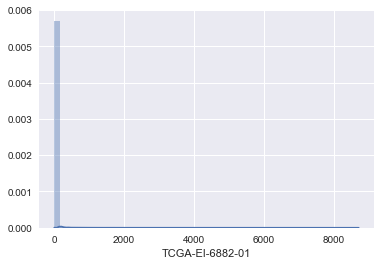

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


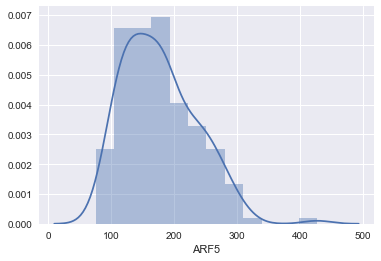

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_read_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-EI-6882-01,TCGA-DC-6155-01,TCGA-DY-A1DC-01,TCGA-AH-6903-01,TCGA-EI-6511-01,TCGA-EI-6510-01,TCGA-EI-6508-01,TCGA-BM-6198-01,TCGA-AH-6544-01,TCGA-AF-6655-01,...,TCGA-AF-2689-11,TCGA-DC-6681-01,TCGA-AG-3731-01,TCGA-AG-3902-01,TCGA-DY-A1DG-01,TCGA-AG-3731-11,TCGA-AF-A56K-01,TCGA-AF-A56N-01,TCGA-AF-A56L-01,TCGA-AF-3400-11
A1BG,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,...,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,25.143054,0.020340,25.143054,25.143054
A1CF,2.295240,0.736553,2.807690,4.299590,2.456030,2.075760,7.678340,2.790380,3.532950,2.540130,...,4.453070,7.629560,2.312930,2.485580,2.970580,3.643170,1.217500,7.996360,1.544470,3.582680
A2M,71.631600,13.111200,48.057800,41.103600,64.270800,25.308100,111.201000,34.791900,19.931500,79.692400,...,147.185000,206.555000,229.850000,61.673600,10.428500,154.369000,122.660000,55.355000,46.485500,66.153500
A2ML1,0.037901,0.095877,0.018627,0.044587,0.011837,0.039835,0.078577,0.064193,0.070981,0.065528,...,0.066725,0.026920,0.163680,0.084296,0.068646,0.027821,0.028816,0.062775,0.049028,0.216711
A3GALT2,0.044777,0.044777,0.044777,0.044777,0.044777,0.044777,0.024213,0.044777,0.044777,0.071584,...,0.044777,0.044777,0.044777,0.030077,0.044777,0.017327,0.044777,0.044777,0.044777,0.044777


In [34]:
normalized_matrix.shape

(18852, 177)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-EI-6882-01,TCGA-DC-6155-01,TCGA-DY-A1DC-01,TCGA-AH-6903-01,TCGA-EI-6511-01,TCGA-EI-6510-01,TCGA-EI-6508-01,TCGA-BM-6198-01,TCGA-AH-6544-01,TCGA-AF-6655-01,...,TCGA-AF-2689-11,TCGA-DC-6681-01,TCGA-AG-3731-01,TCGA-AG-3902-01,TCGA-DY-A1DG-01,TCGA-AG-3731-11,TCGA-AF-A56K-01,TCGA-AF-A56N-01,TCGA-AF-A56L-01,TCGA-AF-3400-11
A1BG,1.620024,1.713671,1.554988,1.572508,1.673257,1.588019,1.593866,1.563608,1.550745,1.594776,...,1.605268,1.587053,1.621311,1.610725,1.572406,1.631443,1.673843,-1.492178,1.592924,1.661146
A1CF,0.580435,0.180457,0.602919,0.805517,0.663073,0.504779,1.078716,0.608853,0.698465,0.599214,...,0.853509,1.069134,0.585056,0.605735,0.644829,0.792505,0.358894,1.102368,0.381286,0.814936
A2M,2.074711,1.430896,1.836334,1.785970,2.080853,1.590861,2.239557,1.704668,1.449867,2.095775,...,2.372713,2.501670,2.582338,2.000406,1.190210,2.419585,2.362128,1.942632,1.859824,2.081281
A2ML1,-1.201745,-0.705032,-1.575282,-1.178706,-1.653915,-1.212129,-0.911257,-1.029320,-0.998531,-0.989212,...,-0.970863,-1.383294,-0.565111,-0.863886,-0.991399,-1.324605,-1.266937,-1.002736,-1.117053,-0.403391
A3GALT2,-1.129338,-1.035691,-1.194374,-1.176854,-1.076105,-1.161343,-1.422512,-1.185755,-1.198617,-0.950823,...,-1.144095,-1.162310,-1.128051,-1.311457,-1.176956,-1.530244,-1.075519,-1.149469,-1.156438,-1.088216


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-EI-6882-01,TCGA-DC-6155-01,TCGA-DY-A1DC-01,TCGA-AH-6903-01,TCGA-EI-6511-01,TCGA-EI-6510-01,TCGA-EI-6508-01,TCGA-BM-6198-01,TCGA-AH-6544-01,TCGA-AF-6655-01,...,TCGA-AF-2689-11,TCGA-DC-6681-01,TCGA-AG-3731-01,TCGA-AG-3902-01,TCGA-DY-A1DG-01,TCGA-AG-3731-11,TCGA-AF-A56K-01,TCGA-AF-A56N-01,TCGA-AF-A56L-01,TCGA-AF-3400-11
A1BG,1.447457,1.872633,1.612337,1.579795,1.607447,1.590426,1.463612,1.717186,1.585669,1.497923,...,1.582786,1.508192,1.491261,1.580139,1.649503,1.605167,1.675271,-1.447419,1.606525,1.593959
A1CF,0.385535,0.687617,0.724262,0.783917,0.586256,0.536934,0.929426,0.736024,0.779893,0.462569,...,0.770184,0.964571,0.345179,0.517703,0.769645,0.702336,0.158277,1.015609,0.391382,0.773031
A2M,1.951054,1.659625,1.883183,1.806448,2.024258,1.593423,2.164664,1.859175,1.486476,2.027470,...,2.340718,2.476307,2.552587,1.989908,1.284567,2.381680,2.451449,1.900317,1.877864,2.002366
A2ML1,-1.281365,-0.592758,-1.410808,-1.037173,-1.609472,-1.112442,-0.928514,-0.940601,-0.801597,-1.048437,...,-1.024982,-1.361885,-0.713066,-0.837572,-0.842711,-1.357357,-1.514549,-1.005301,-1.060813,-0.559368
A3GALT2,-1.211887,-1.020758,-1.048687,-1.035103,-1.081746,-1.059745,-1.411297,-1.087582,-1.026022,-1.016446,...,-1.178558,-1.144933,-1.194729,-1.231802,-1.050255,-1.550718,-1.307622,-1.135893,-1.102038,-1.306489


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-EI-6882-01,TCGA-DC-6155-01,TCGA-DY-A1DC-01,TCGA-AH-6903-01,TCGA-EI-6511-01,TCGA-EI-6510-01,TCGA-EI-6508-01,TCGA-BM-6198-01,TCGA-AH-6544-01,TCGA-AF-6655-01,...,TCGA-AF-2689-11,TCGA-DC-6681-01,TCGA-AG-3731-01,TCGA-AG-3902-01,TCGA-DY-A1DG-01,TCGA-AG-3731-11,TCGA-AF-A56K-01,TCGA-AF-A56N-01,TCGA-AF-A56L-01,TCGA-AF-3400-11
A1BG,-1.708202,3.658633,0.373015,-0.037751,0.311292,0.096443,-1.504289,1.696480,0.036399,-1.071191,...,0.000000,-0.941571,-1.155285,-0.033416,0.842148,0.282516,1.167408,-38.249185,0.299651,0.141033
A1CF,-1.062815,0.283906,0.447273,0.713220,-0.167976,-0.387861,1.361921,0.499707,0.695282,-0.719391,...,0.651996,1.518599,-1.242728,-0.473592,0.649595,0.349522,-2.075960,1.746133,-1.036749,0.664691
A2M,0.182502,-0.865774,-0.061632,-0.337649,0.445816,-1.103906,0.950860,-0.147989,-1.488597,0.457372,...,1.584131,2.071846,2.346228,0.322259,-2.214867,1.731472,1.982430,0.000000,-0.080764,0.367070
A2ML1,-0.745070,1.457590,-1.159124,0.036030,-1.794594,-0.204733,0.383602,0.344938,0.789574,0.000000,...,0.075026,-1.002634,1.072758,0.674500,0.658061,-0.988149,-1.490964,0.137980,-0.039587,1.564395
A3GALT2,-0.535621,1.569896,1.262233,1.411870,0.898046,1.140412,-2.732357,0.833753,1.511915,1.617398,...,-0.168455,0.201965,-0.346607,-0.755004,1.244951,-4.268257,-1.590255,0.301551,0.674500,-1.577774


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(18852, 177)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18423, 177)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18335, 177)

# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


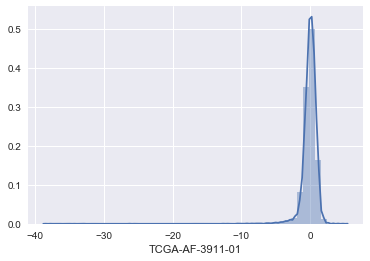

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


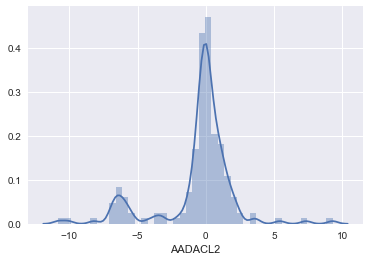

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_read_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18335, 2)

# Save Gene List

In [56]:
filename = path+'tcga_read_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-AF-2687-01,57,MALE,M0,N2,T3,Stage IIIC,Rectal Adenocarcinoma,Primary Solid Tumor,Rectum,NaN
TCGA-AF-2689-11,41,FEMALE,M1,N2,T3,Stage IV,Rectal Adenocarcinoma,Solid Tissue Normal,Rectum,NaN
TCGA-AF-2690-01,76,FEMALE,M0,N2,T3,Stage IIIC,Rectal Adenocarcinoma,Primary Solid Tumor,Rectum,NaN
TCGA-AF-2691-01,48,FEMALE,M0,N0,T1,Stage I,Rectal Adenocarcinoma,Primary Solid Tumor,Rectum,NaN
TCGA-AF-2691-11,48,FEMALE,M0,N0,T1,Stage I,Rectal Adenocarcinoma,Solid Tissue Normal,Rectum,NaN


In [60]:
attribute_list.shape

(177, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_read_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-AF-2687-01,TCGA-AF-2689-11,TCGA-AF-2690-01,TCGA-AF-2691-01,TCGA-AF-2691-11,TCGA-AF-2692-01,TCGA-AF-2692-11,TCGA-AF-2693-01,TCGA-AF-3400-01,TCGA-AF-3400-11,...,TCGA-F5-6813-01,TCGA-F5-6814-01,TCGA-F5-6861-01,TCGA-F5-6863-01,TCGA-F5-6864-01,TCGA-G5-6233-01,TCGA-G5-6235-01,TCGA-G5-6572-01,TCGA-G5-6572-02,TCGA-G5-6641-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.365954,-0.004528,0.764182,0.605851,-0.286875,0.391003,-0.399805,-0.151306,0.334464,0.119816,...,0.085896,-0.523958,-0.557901,-0.433668,-0.365954,0.153639,-0.862696,-0.817531,0.990511,0.583179
A1CF,-0.915456,0.530429,-0.949322,0.044413,-0.102444,0.021843,0.259151,-0.373525,-0.757373,0.541719,...,0.451245,-0.621933,-0.000813,0.055713,-0.588014,-0.215385,0.858489,0.892437,0.994240,0.700065
A2M,0.775244,0.729977,0.911083,0.300359,0.752600,0.582899,0.945018,0.458545,0.526429,0.277720,...,0.447235,0.232465,-0.377542,0.266430,0.865805,0.356813,-0.942041,0.390715,0.990229,-0.862980
A2ML1,0.590481,0.070638,0.104501,-0.697352,-0.550578,-0.347322,-0.200492,-0.234365,0.420891,0.748876,...,0.353105,0.432207,0.443517,0.149663,0.183561,0.556608,0.522693,-0.798943,0.115834,0.307930
A3GALT2,-0.592687,-0.208771,-0.942720,-0.231372,-0.976556,-0.626613,-0.987836,0.548336,0.028425,-0.750785,...,0.570881,0.390027,0.616242,0.288363,-0.276478,0.344840,0.638854,-0.875025,0.627542,0.819837


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

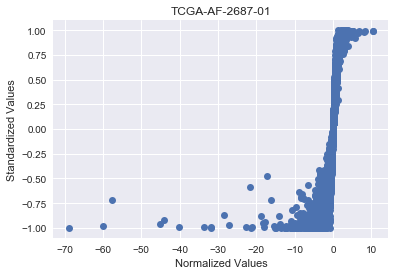

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_read_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-AF-2687-01,TCGA-AF-2689-11,TCGA-AF-2690-01,TCGA-AF-2691-01,TCGA-AF-2691-11,TCGA-AF-2692-01,TCGA-AF-2692-11,TCGA-AF-2693-01,TCGA-AF-3400-01,TCGA-AF-3400-11,...,TCGA-F5-6813-01,TCGA-F5-6814-01,TCGA-F5-6861-01,TCGA-F5-6863-01,TCGA-F5-6864-01,TCGA-G5-6233-01,TCGA-G5-6235-01,TCGA-G5-6572-01,TCGA-G5-6572-02,TCGA-G5-6641-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,-1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_bread_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_read_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_read_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_read_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_read_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-AF-2687, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2689, Age:41.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage IV, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2690, Age:76.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2691, Age:48.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2691, Age:48.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage I, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2692, Age:54.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:nan, Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2692, Age:54.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage IIA, Histology:nan, Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-AF-2693, Age:75.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:nan, Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-AF-3400, Age:54.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Rectal Mucinous Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-AF-3400, Age:54.0, Gender:MALE, SampleType:Solid Tissue Normal, Stage:Stage IIA, Histology:Rectal Mucinous Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)",...,"(Donor:TCGA-F5-6813, Age:70.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-F5-6814, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-F5-6861, Age:60.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-F5-6863, Age:71.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-F5-6864, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-G5-6233, Age:74.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-G5-6235, Age:72.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-G5-6572, Age:56.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-G5-6572, Age:56.0, Gender:MALE, SampleType:Recurrent Solid Tumor, Stage:nan, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)","(Donor:TCGA-G5-6641, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Rectal Mucinous Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-AF-2687, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)",1.000000,0.156950,0.348276,0.033108,0.146077,0.054620,0.215857,0.102143,0.105871,-0.019965,...,0.168525,0.218012,0.050282,0.098660,0.367886,0.156548,0.010179,0.165074,-0.008071,0.024323
"(Donor:TCGA-AF-2689, Age:41.0, Gender:FEMALE, SampleType:Solid Tissue Normal, Stage:Stage IV, Histology:Rectal Adenocarcinoma, Tissue:Rectum, Tumor:nan, Gradenan)",0.156950,1.000000,0.288659,0.098728,0.581505,0.006855,0.585466,0.109824,0.156681,0.288658,...,0.036318,0.032306,0.030996,0.086548,0.173673,0.018008,0.014352,0.104241,0.118148,0.023212
"(Donor:TCGA-AF-2690, Age:7

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_read_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

clustergrammer_widget(network='{"views": [{"nodes": {"col_nodes": [{"cat_7_index": 0, "cat-1": "Gender:MALE", …

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.082968,0.096588,-0.120646,0.062722,0.067644,-0.027665,-0.085540,-0.013762,-0.064336,...,0.085394,-0.067303,-0.118389,-0.056773,-0.082828,0.073253,0.148607,-0.065122,-0.057208,0.098897
A1CF,0.082968,1.000000,-0.150932,-0.216598,-0.059437,-0.309907,-0.171746,-0.047566,0.100699,0.047630,...,-0.177734,-0.008027,0.191670,0.197189,0.081084,0.044715,0.016753,-0.097499,0.356289,-0.019842
A2M,0.096588,-0.150932,1.000000,-0.115916,-0.387061,0.573115,-0.195948,-0.338398,-0.170861,-0.087117,...,-0.148070,-0.371771,-0.207143,-0.125607,-0.313152,0.090796,0.193074,0.346150,0.235792,0.135912
A2ML1,-0.120646,-0.216598,-0.115916,1.000000,0.181654,0.083298,0.114856,-0.054254,-0.078837,0.033569,...,0.131143,0.139569,-0.091802,-0.161589,-0.028795,-0.087352,-0.008645,-0.026685,-0.117963,-0.054857
A3GALT2,0.062722,-0.059437,-0.387061,0.181654,1.000000,-0.225092,0.318832,0.013211,-0.117124,0.119522,...,0.074300,0.193903,0.196782,0.193879,0.130754,-0.017542,-0.046589,-0.180944,-0.188577,-0.053705


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_read_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_read_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  177 Out of 177   

 The number of statisticaly relevent gene-attribute associations is: 162528
